<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/manifold_optimization_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rayleigh quotient on the sphere: a quick look

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d = 3
np.random.seed(1)
A = np.random.randn(d,d)
max_iter = 10000
iterates = np.zeros((len(A),max_iter))
A = A.T@A
x0 = np.random.randn(d)
x0 = x0/np.linalg.norm(x0)
eta_k = 1 / (2*np.linalg.norm(A))
min_eig_A = np.linalg.eigvals(A).min()
eps = 1e-6
converge = False

def evaluate_f(A,x):
    Ax = A@x
    f = np.dot(Ax,x)
    return f

def retraction(x,v):
    return (x + v)/np.linalg.norm(x+v)

x = x0
for k in range(max_iter):
    Ax = A@x
    f = evaluate_f(A,x)

    gradf_xk = Proj_xk_euclidean_gradf_xk = 2*(Ax - f*x)
    v = -eta_k*gradf_xk
    x = retraction(x,v) # xk+1 = Rx(-eta_k gradf(xk))
    print(np.linalg.norm(A@x-x))

    x = retraction(x,v)
    iterates[:,k] = x

    if abs(min_eig_A - f) < eps:
      converge = True
      iterates = iterates[:,:k]
      print('Reimannien Gradient Descent did converge')
      print(f'Final position {x.round(1)}')
      print(f'Final function value {f.round(1)}')
      print(f'Number of iterations {k}')
      break

if not converge:
  print('Reimannien Gradient Descent did not converge')
  print(f'Final position {x.round(1)}')
  print(f'Final function value {f.round(1)}')

4.956412436216609
2.0897165686378214
1.38141880861813
1.0593698885314824
1.004159816831074
0.9995188209804812
0.9991165411083294
0.9990324415166866
0.9989860303780892
0.9989534583231048
0.9989298801543366
0.9989127096183361
0.9989001703243643
0.9988909957082497
0.9988842736508562
0.9988793435476737
0.9988757250149585
0.9988730676813553
0.9988711154383041
0.9988696807757577
0.9988686262436984
0.9988678509985814
0.9988672810060129
0.9988668618875632
0.9988665536880913
0.9988663270425158
0.99886616036482
0.9988660377850846
0.9988659476346294
0.9988658813331692
0.9988658325710458
0.9988657967081512
0.998865770332061
0.9988657509331553
0.9988657366657392
0.9988657261723848
0.9988657184547525
0.9988657127785974
Reimannien Gradient Descent did converge
Final position [0.4 0.9 0.2]
Final function value 0.0
Number of iterations 37


In [ ]:

u, v = np.mgrid[0:np.pi:50j, 0:2*np.pi:50j]

x = np.sin(u) * np.cos(v)
y = np.sin(u) * np.sin(v)
z = np.cos(u)

In [ ]:
x_ = np.stack([x.flatten(),y.flatten(),z.flatten()],axis=1)


In [ ]:
Ax = (A @ x_.T)
Ax.shape

(3, 2500)

In [ ]:
x_.shape

(2500, 3)

In [ ]:
f = (Ax * x_.T).sum(0)

Text(0.5, 0.92, 'Rayleigh Quotient on Sphere with Trajectory')

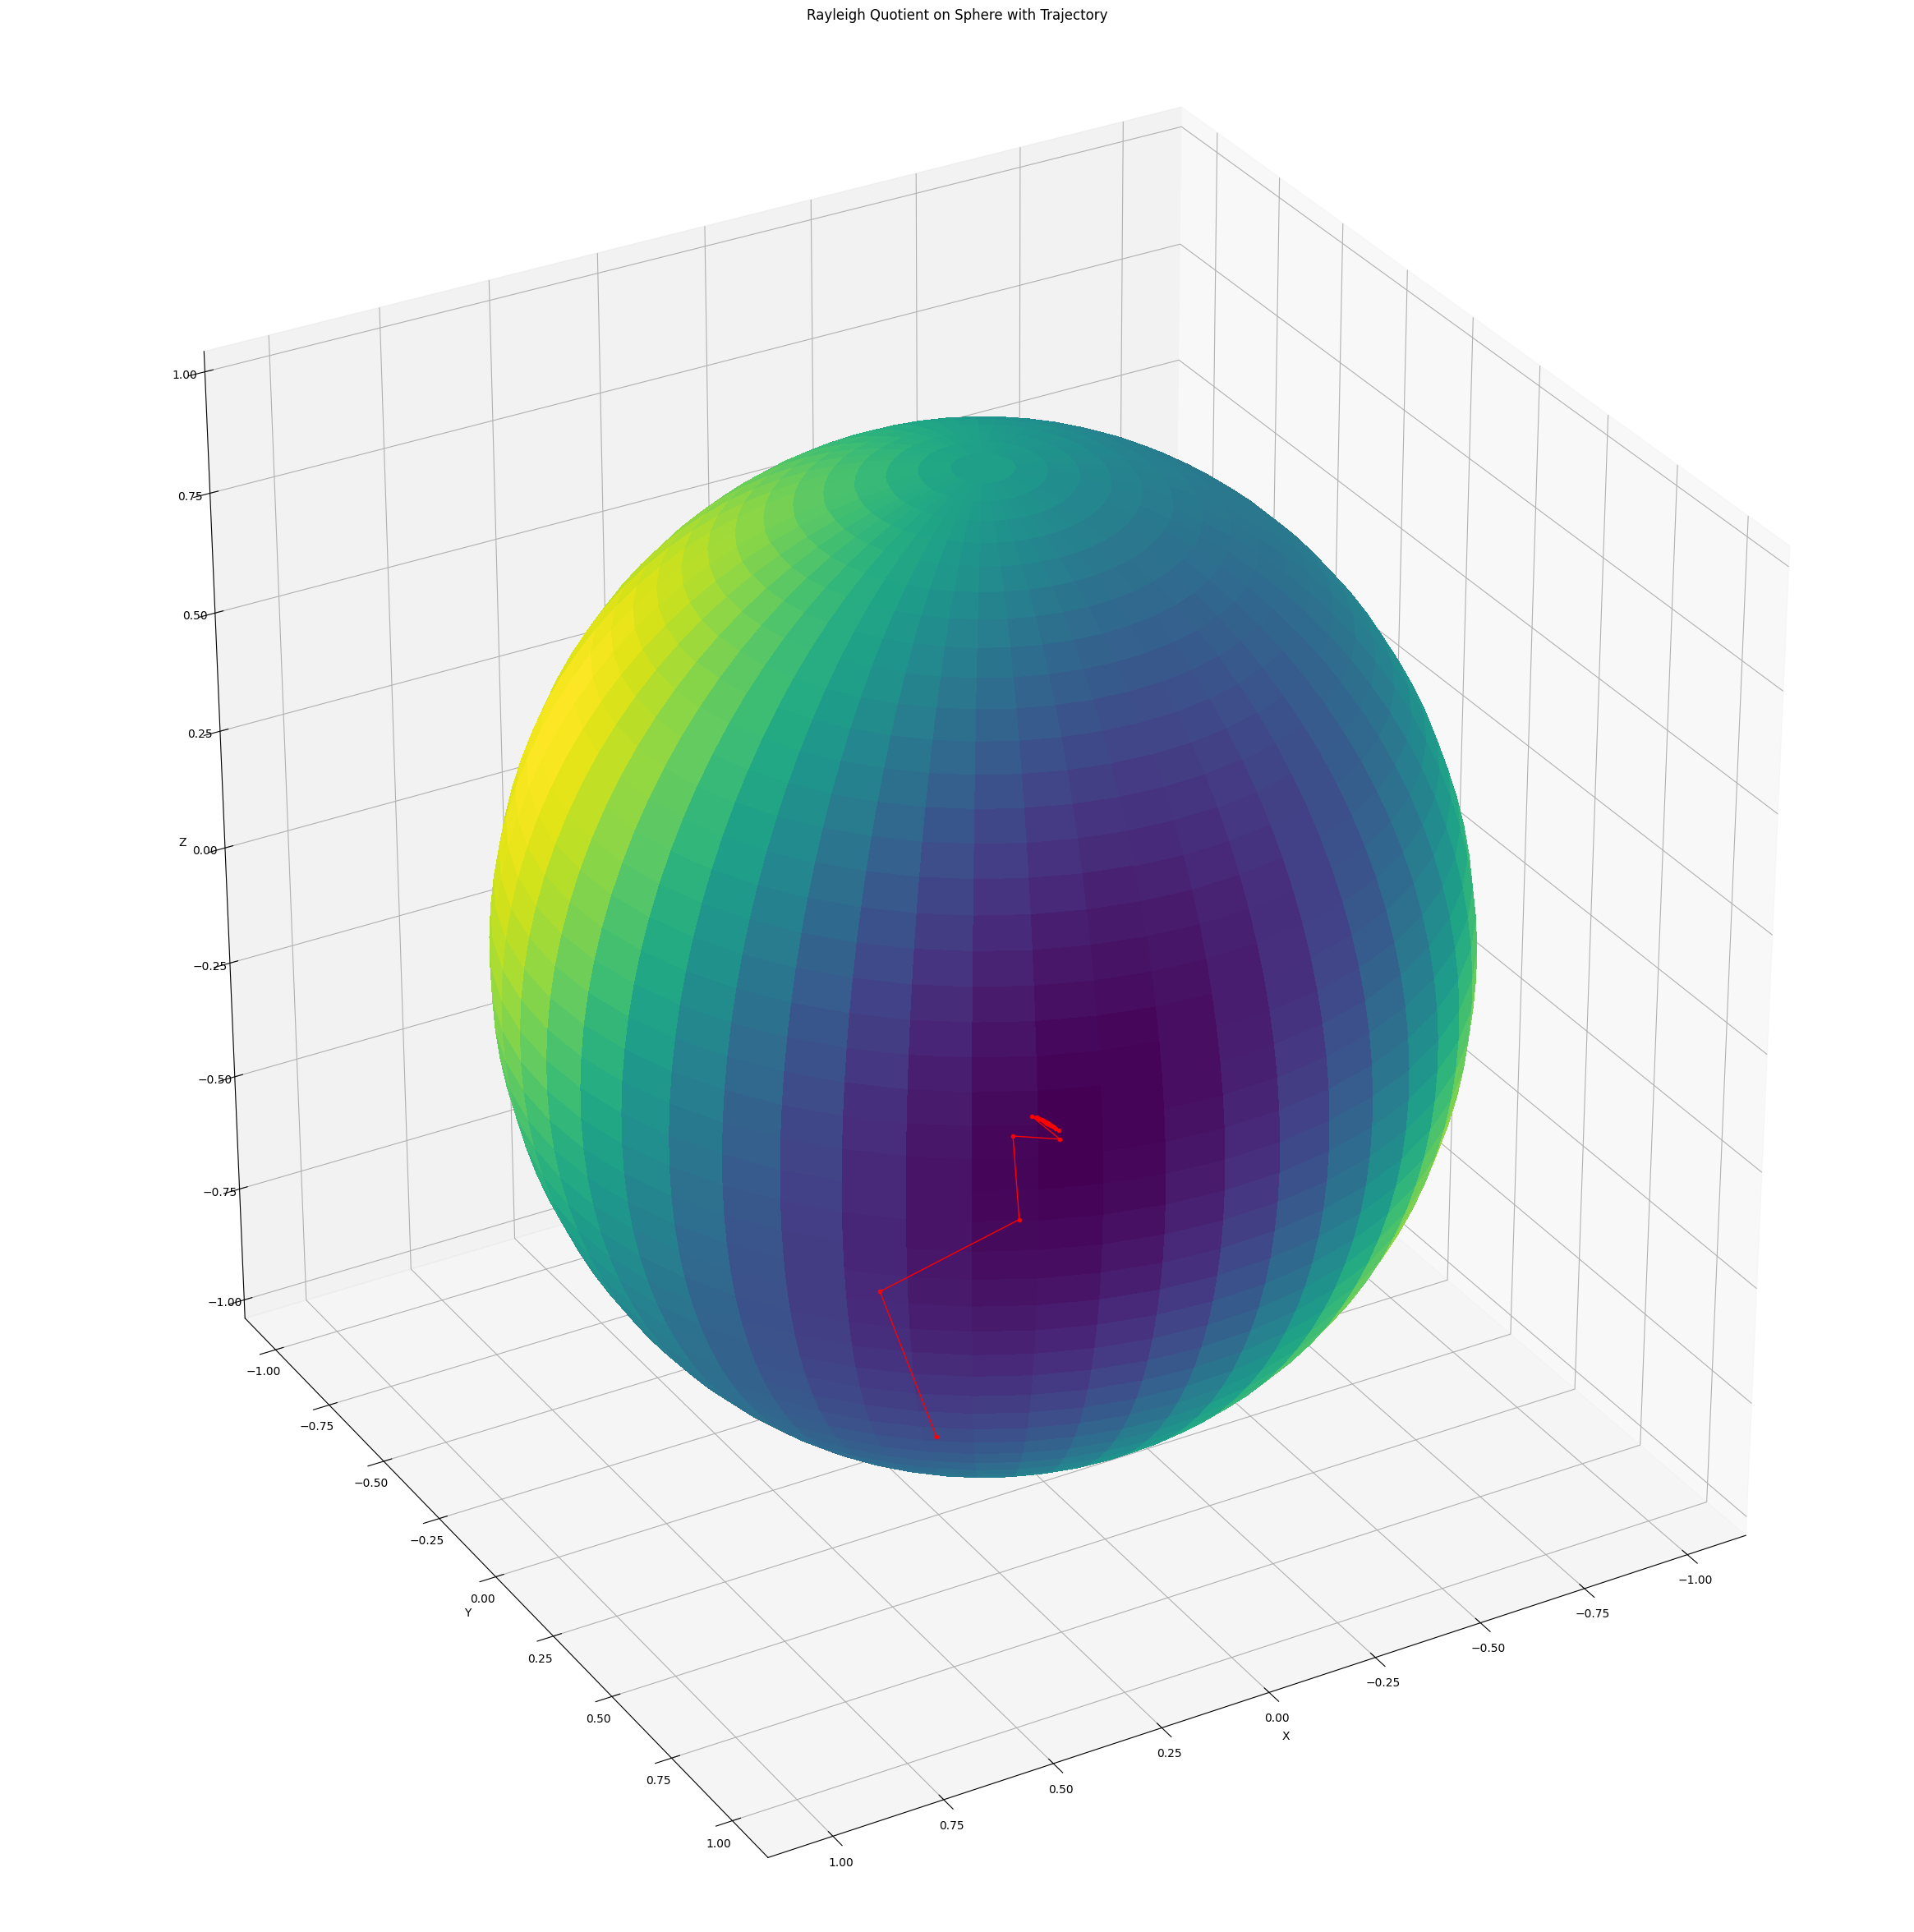

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:np.pi:50j, 0:2*np.pi:50j]

x = np.sin(u) * np.cos(v)
y = np.sin(u) * np.sin(v)
z = np.cos(u)

ax.view_init(elev=30, azim=60)  # Adjust elev and azim to get the desired view
radius = 1

ax.plot_surface(radius*x, radius*y, radius*z, rstride=1, cstride=1, cmap=cm.coolwarm, alpha=1,
                       linewidth=0, antialiased=False,
                       facecolors=plt.cm.viridis(f.reshape(y.shape) / np.max(np.abs(f)))
)



# Step 5: Define trajectory points (example points on the sphere)
traj_x, traj_y, traj_z = iterates


# Plot the trajectory as a line or scatter plot
ax.plot(traj_x, traj_y, traj_z, color="red", marker="o", linestyle="-", linewidth=1, markersize=3, alpha=1, zorder=4)
# Plot the trajectory with scatter and a high zorder
# ax.scatter(traj_x, traj_y, traj_z, color="red", marker="o", linestyle="-", linewidth=2, s=100, zorder=4)  # Higher zorder value

# Optionally, plot trajectory line with a high zorder
# ax.plot(traj_x, traj_y, traj_z, color="red", linestyle="-", linewidth=2,  markersize=10, zorder=4)


# Enhance plot appearance
ax.set_box_aspect([1,1,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Rayleigh Quotient on Sphere with Trajectory")

